In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
# Read the data
df = pd.read_csv('HBN.csv', index_col=False)

# Drop the first column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Check the data information
df.info()

# Check the table
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Enrol_Season                            3960 non-null   object 
 2   Age                                     3960 non-null   int64  
 3   Sex                                     3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-Score                              2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FE-Season,FE-Max_Stage,FE-Time_Mins,FE-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,71.0,70.0,104.0,NaN,NaN,NaN,NaN,Fall,16.0,0.0,18.0,1.0,19.9,2.0,10.0,1.0,8.0,1.0,9.0,1.0,12.0,1.0,Fall,3.0,4.52277,16.3642,1206.880,2051.70,19.46110,70.8117,14.0629,2.30138,11.58830,1.0,33.3709,17.97970,66.2889,29.7790,52.8320,NaN,NaN,Winter,3.260,Winter,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,27.0,60.0

C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


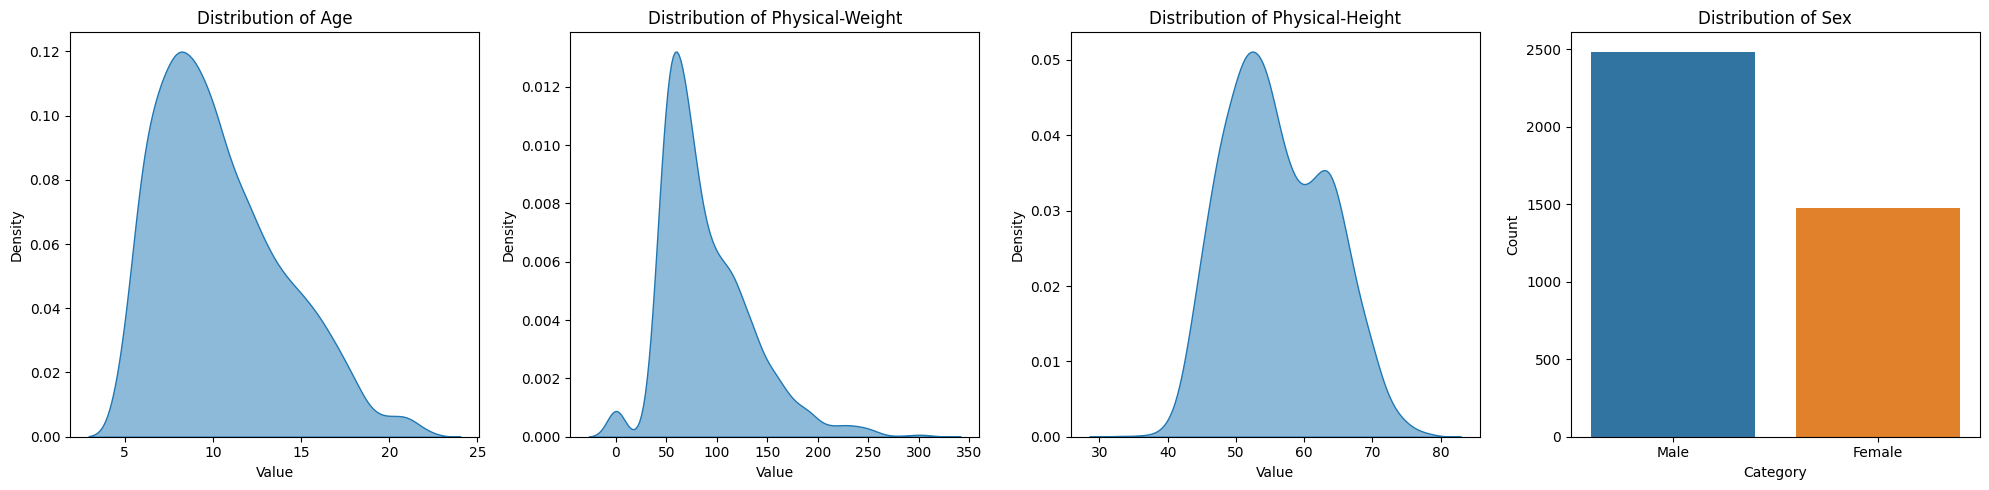

In [18]:
# Check the distribution of the some variables
columns_to_plot = ['Age', 'Physical-Weight', 'Physical-Height', 'Sex',] 
num_columns = len(columns_to_plot)  
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(20, 5))  
for i, column in enumerate(columns_to_plot):  
    if column == 'Sex':  
        sns.countplot(x=column, data=df, ax=axes[i])
        axes[i].set_xticklabels(['Male', 'Female'])
        axes[i].set_title(f'Distribution of {column}')  
        axes[i].set_xlabel('Category')  
        axes[i].set_ylabel('Count')  
    else:  
        sns.kdeplot(df[column], ax=axes[i], fill=True, alpha=0.5)  
        axes[i].set_title(f'Distribution of {column}')  
        axes[i].set_xlabel('Value')  
        axes[i].set_ylabel('Density')  
plt.tight_layout()  
plt.show()  

In [56]:
# Check the number and percentage of missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
id,0,0.000000
Enrol_Season,0,0.000000
Age,0,0.000000
Sex,0,0.000000
CGAS-Season,1405,35.479798
...,...,...
SDS-SDS_Total_Raw,1351,34.116162
SDS-SDS_Total_T,1354,34.191919
PreInt_EduHx-Season,420,10.606061
PreInt_EduHx-computerinternet_hoursday,659,16.641414


In [20]:
df[['Physical-BMI', 'BIA-BIA_BMI']] # Values are the same but Physical-BMI has less Nan Values

,Physical-BMI,BIA-BIA_BMI
0,16.877316,16.8792
1,14.035590,14.0371
2,16.648696,NaN
3,18.292347,18.2943
4,NaN,NaN
...,...,...
3955,16.362460,16.3642
3956,18.764678,NaN
3957,21.441500,21.4438
3958,12.235895,12.2372


In [41]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap to check the correlation between the variables
corr_df = numeric_df.corr()

corr_map = px.imshow(corr_df.abs(), color_continuous_scale=('blue', 'white', 'red'), title='Correlation Heatmap')
corr_map.update_layout(width=1000, height=800)
corr_map.show()

<div dir="rtl">
<h3>نکته:</h3>
بچه ها چون دیتا زیاده با plotly رسم شده که بشه زوم کرد!

In [ ]:
# Identify columns that have more than 70% correlation with the target variable
target_corr = numeric_df.corr()['sii'].abs()
target_corr = target_corr[target_corr > 0.7].sort_values(ascending=False)
target_corr

sii                  1.000000
PCIAT-PCIAT_Total    0.899681
PCIAT-PCIAT_15       0.751399
PCIAT-PCIAT_18       0.731112
PCIAT-PCIAT_17       0.729867
PCIAT-PCIAT_05       0.722722
PCIAT-PCIAT_13       0.705679
PCIAT-PCIAT_20       0.703013
Name: sii, dtype: float64

## Data Preprocessing

In [21]:
male_df = df[df['Sex'] == 0].copy()
female_df = df[df['Sex'] == 1].copy()

In [22]:
female_df[female_df['BIA-BIA_BMR'] > 4000] # Outiliers

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FE-Season,FE-Max_Stage,FE-Time_Mins,FE-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
3205,cedf96c5,Fall,9,1,Spring,50.0,Winter,16.972291,54.0,70.4,NaN,75.0,95.0,151.0,Winter,NaN,NaN,NaN,Winter,5.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.5,0.0,8.0,0.0,9.0,1.0,Winter,2.0,4115.360,0.048267,83152.2,124728.0,3233.000,8799.08,7.86485,-7.81659,-8745.08,2.0,2457.910,3108.17,4683.710,3607.690,5690.910,NaN,NaN,Fall,3.269,Winter,2.0,2.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,13.0,Winter,36.0,51.0,Fall,0.0,0.0
3511,e252dcb6,Spring,13,1,Fall,58.0,Spring,23.605261,61.5,127.0,NaN,57.0,74.0,110.0,NaN,NaN,NaN,NaN,Spring,20.0,1.0,22.5,2.0,23.7,2.0,1.0,0.0,12.0,1.0,12.0,1.0,12.0,1.0,Summer,2.0,401.002,23.607800,11540.8,17311.2,350.849,1171.51,217.77100,-194.16300,-1044.51,2.0,428.264,392.40,770.511,823.028,779.114,NaN,NaN,Summer,1.250,Summer,1.0,4.0,4.0,0.0,4.0,4.0,0.0,5.0,5.0,5.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,68.0,Summer,48.0,67.0,Spring,3.0,2.0


In [23]:
female_df[female_df['CGAS-Score'] > 100] # Outliers

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FE-Season,FE-Max_Stage,FE-Time_Mins,FE-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
2065,83525bbe,Fall,11,1,Winter,999.0,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,2.241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0,NaN


# PART 2 

C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


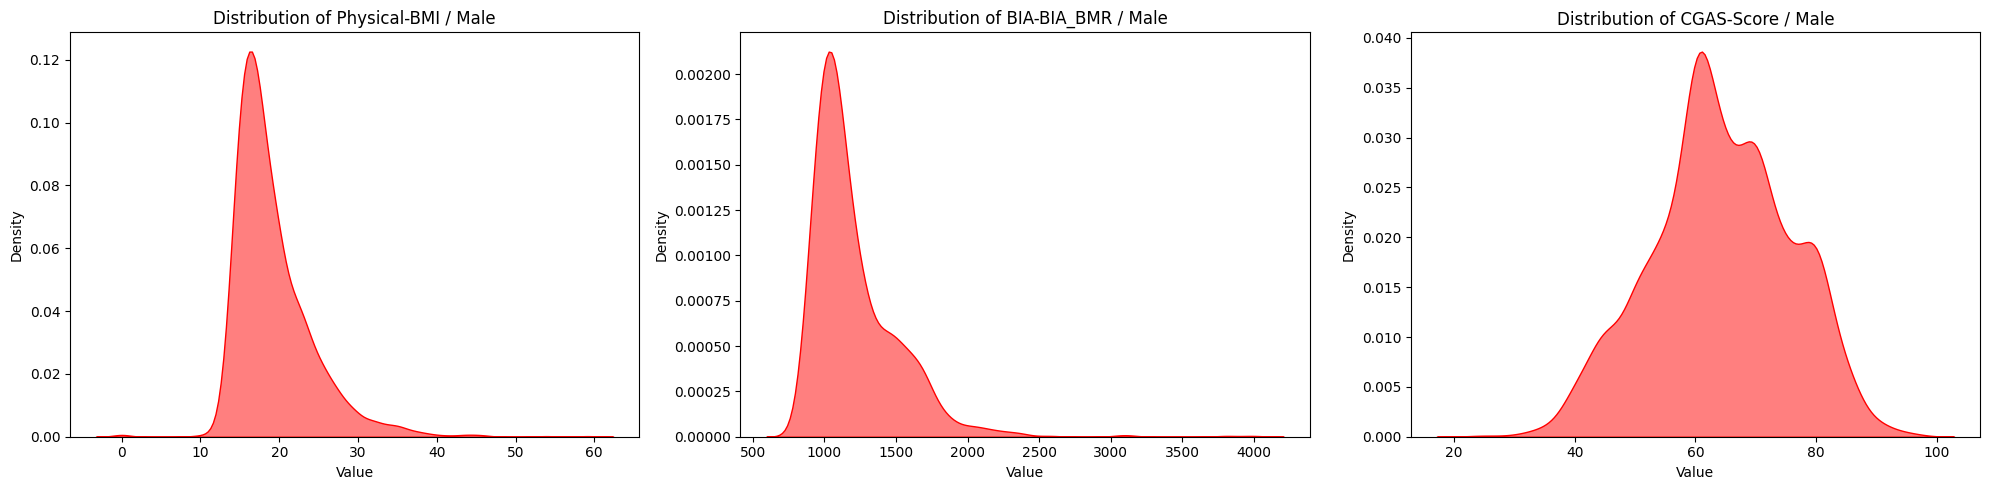

C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


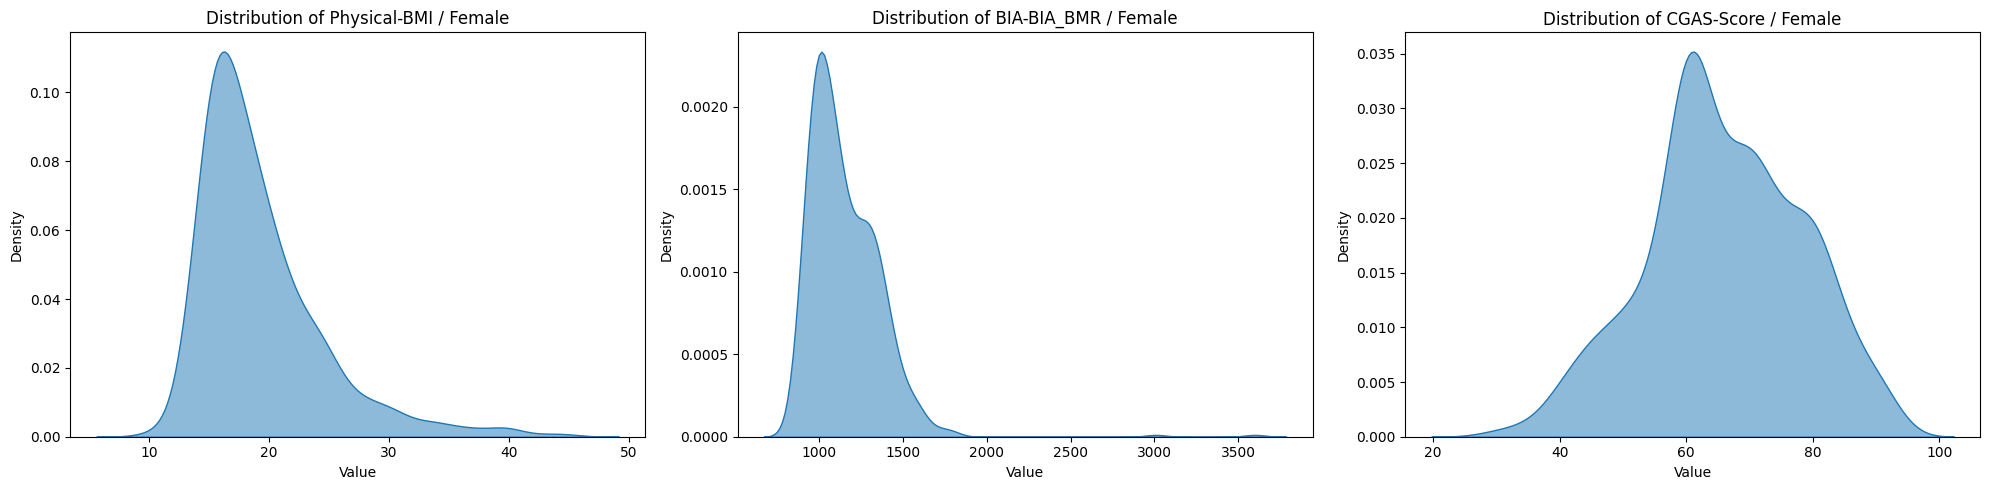

In [24]:
# Physical-BMI
# BIA-BIA_BMI
# شاخص توده‌ی بدنی
# BIA-BIA_BMR
# نرخ متابولیسم پایه
# CGAS-Score
# معیار کلی میزان عملکرد ذهنی افراد زیر ۱۸ سال


female_df = female_df[female_df['CGAS-Score'] < 100] # Outliers
female_df = female_df[female_df['BIA-BIA_BMR'] < 4000]

columns_to_plot = ['Physical-BMI', 'BIA-BIA_BMR', 'CGAS-Score']
num_columns = len(columns_to_plot)  
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(20, 5))  
for i, column in enumerate(columns_to_plot):  
        sns.kdeplot(male_df[column], ax=axes[i], fill=True, alpha=0.5, color='red')  
        axes[i].set_title(f'Distribution of {column} / Male')  
        axes[i].set_xlabel('Value')  
        axes[i].set_ylabel('Density')  
plt.tight_layout()  
plt.show()  

fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(20, 5))  
for i, column in enumerate(columns_to_plot):  
        sns.kdeplot(female_df[column], ax=axes[i], fill=True, alpha=0.5)  
        axes[i].set_title(f'Distribution of {column} / Female')  
        axes[i].set_xlabel('Value')  
        axes[i].set_ylabel('Density')  
plt.tight_layout()  
plt.show()

In [25]:
male_df.describe()

,Age,Sex,CGAS-Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FE-Max_Stage,FE-Time_Mins,FE-Time_Sec,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,2484.000000,2484.0,1553.000000,1920.000000,1922.000000,1956.000000,539.000000,1868.000000,1876.000000,1868.000000,479.000000,479.000000,479.000000,1495.000000,1468.000000,679.000000,669.000000,679.000000,669.000000,1486.000000,1460.000000,1481.000000,1456.000000,1482.000000,1457.000000,1495.000000,1469.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,272.000000,1083.000000,1737.000000,1738.000000,1736.000000,1737.000000,1733.000000,1737.000000,1735.000000,1737.000000,1738.000000,1738.000000,1738.000000,1737.000000,1735.000000,1738.000000,1737.000000,1733.000000,1731.000000,1734.000000,1735.000000,1738.000000,1739.000000,1663.000000,1662.000000,2096.000000,1739.000000
mean,10.257246,0.0,64.194462,19.232013,56.028606,88.929182,27.369388,69.627409,81.319296,117.311563,5.077244,7.559499,27.125261,11.119732,0.465259,23.054094,1.715994,24.256907,1.780269,6.330417,0.342466,8.014315,0.591346,8.127227,0.599176,8.992441,0.755616,2.724960,4.563161,19.287545,1210.548410,2093.847607,18.341661,71.202325,15.135579,4.151968,20.493138,1.759141,33.966061,18.894611,66.639171,33.407844,52.307723,2.323018,2.654404,2.501439,2.267549,2.535138,0.914220,2.421812,1.115717,0.547550,1.286701,1.061565,1.365362,1.698504,0.243523,1.439193,1.055236,1.622337,1.563185,1.740035,1.741061,1.265706,1.004603,29.338125,41.247144,57.947653,1.061069,0.638873
std,3.481302,0.0,11.365906,4.961223,7.724429,45.438935,5.680682,13.954258,13.810098,17.408459,1.984322,3.256167,18.106062,11.792822,0.498962,11.076090,0.601942,11.949891,0.607709,8.037151,0.474697,3.386568,0.491754,3.382664,0.490234,3.024100,0.429868,1.035118,2.389529,4.854779,304.356156,651.437699,11.881652,32.417953,3.866611,4.347584,22.792086,0.686279,12.442233,8.553403,31.562644,19.579849,24.253591,0.880279,0.808210,1.690010,1.726323,1.620093,1.265507,1.737153,1.321076,1.003979,1.382749,1.268822,1.373529,1.575579,0.532357,1.466924,1.324387,1.562863,1.545374,1.494695,1.583006,1.412277,1.237014,20.829645,10.717110,13.556012,1.084097,0.798882
min,5.000000,0.0,25.000000,0.000000,33.000000,0.000000,18.000000,11.000000,27.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.401540,10.676600,813.397000,1073.450000,1.789450,28.900400,11.322900,-66.378000,-217.522000,1.000000,14.489000,4.635810,23.620100,4.655730,20.589200,0.660000,0.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,38.000000,0.000000,0.000000
25%,8.000000,0.0,55.000000,15.865054,50.000000,57.550000,23.000000,61.000000,72.000000,107.000000,4.000000,6.000000,12.000000,2.000000,0.000000,15.100000,1.00000

In [26]:
pd.set_option('display.max_columns', None)  
female_df.describe(include='all')  

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FE-Season,FE-Max_Stage,FE-Time_Mins,FE-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
count,577,577,577.000000,577.0,577,577.000000,577,576.000000,576.000000,576.000000,91.000000,570.000000,571.000000,570.000000,287,202.000000,199.000000,199.000000,562,476.000000,467.000000,215.000000,214.000000,215.000000,215.000000,472.000000,463.000000,477.000000,468.000000,477.000000,468.000000,477.000000,468.000000,577,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,85,85.000000,306,306.000000,569,569.000000,569.000000,568.000000,568.000000,569.000000,569.000000,568.000000,567.00000,567.000000,568.000000,569.000000,569.000000,568.000000,567.000000,567.000000,568.000000,568.000000,568.000000,568.000000,568.000000,569.000000,516,516.000000,516.000000,577,565.000000,569.000000
unique,577,4,NaN,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN
top,fefaffe0,Spring,NaN,NaN,Spring,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,NaN,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,NaN,Spring,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,NaN,NaN,Spring,NaN,NaN
freq,1,168,NaN,NaN,178,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,98,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153,NaN,NaN,163,NaN,NaN
mean,NaN,NaN,10.365685,1.0,NaN,65.930676,NaN,19.311288,55.394410,88.505208,25.901099,69.819298,82.966725,116.596491,NaN,4.856436,7.050251,29.798995,NaN,12.336134,0.576017,21.283256,2.023364,22.103256,2.134884,4.694915,0.341253,10.189203,0.728632,10.282600,0.709402,9.553459,0.835470,NaN,2.571924,4.430236,19.405366,1151.517808,1826.629480,20.037310,64.914777,14.497091,4.908276,23.773042,1.729636,27.755232,17.122235,60.484542,29.959499,47.792541,NaN,2.074153,NaN,2.457497,NaN,2.154657,1.961336,2.126761,0.697183,2.061511,0.989455,0.663732,1.17284,1.044092,1.151408,1.557118,0.242531,1.156690,0.961199,1.282187,1.253521,1.401408,1.401408,0.966549,0.822183,25.031634,NaN,40.517442,57.069767,NaN,0.964602,0.478032
std,NaN,NaN,3.489031,0.0,NaN,12.254763,NaN,5.167626,6.943626,40.696178,5.302106,13.330224,13.439688,16.913571,NaN,2.195469,3.076054,16.639365,NaN,11.943747,0.494718,10.999528,0.576875,9.226994,0.576358,5.815286,0.474643,2.768313,0.445141,2.822669,0.454524,2.728963,0.371152,NaN,